# T-SNE

T-Distributed Stochastic Neighbor Embedding (t-SNE) es una técnica de reducción de dimensionalidad utilizada para representar un conjunto de datos de alta dimensión en un espacio de baja dimensión de dos o tres dimensiones para que podamos visualizarlo. A diferencia de otros algoritmos de reducción de dimensionalidad como PCA, que simplemente maximiza la varianza, t-SNE crea un espacio de características reducido donde las muestras similares se modelan mediante puntos cercanos y las muestras diferentes se modelan mediante puntos distantes con alta probabilidad.  

T-SNE construye una distribución de probabilidad para las muestras de alta dimensión de tal manera que las muestras similares tienen una alta probabilidad de ser seleccionadas, mientras que los puntos diferentes tienen una probabilidad extremadamente pequeña de ser seleccionadas.


## Algoritmo
Como se mencionó anteriormente, t-SNE toma un conjunto de datos de alta dimensión y lo reduce a un gráfico de baja dimensión que conserva gran parte de la información original.

Supongamos que tuviéramos un conjunto de datos compuesto por 3 clases distintas.

![alt text](https://miro.medium.com/max/601/1*R62g-kSX8zfEUzgwOibosQ.png)  

Queremos reducir la gráfica 2D a una gráfica 1D mientras mantenemos límites claros entre los grupos.

![alt text](https://miro.medium.com/max/700/1*qoozLr_hI_wf8yavTEXx1Q.png)

Recuerde que simplemente proyectar los datos en un eje es un enfoque deficiente para la reducción de la dimensionalidad porque perdemos una cantidad sustancial de información.

![alt text](https://miro.medium.com/max/700/1*I2183keaw5ZJ8adAjVgUvg.png)  

En cambio, podemos usar una técnica de reducción de dimensionalidad (pista: t-SNE) para lograr lo que queremos. El primer paso en el algoritmo t-SNE consiste en medir la distancia desde un punto con respecto a cualquier otro punto. En lugar de trabajar directamente con las distancias, las asignamos a una distribución de probabilidad.

![alt text](https://miro.medium.com/max/596/1*BI0TvFpCZ31dmWQPoFiM6w.png)

En la distribución, los puntos con la menor distancia con respecto al punto actual tienen una probabilidad alta, mientras que los puntos más alejados del punto actual tienen una probabilidad muy baja.


![alt text](https://miro.medium.com/max/514/1*qeMomw4p-57gBFiSkZ2vgg.png)


Echando otro vistazo a la gráfica 2D, observe cómo el grupo azul está más disperso que el verde. Si no abordamos esta diferencia de escala, la probabilidad de que aparezcan los puntos verdes será mayor que la de los azules. Para dar cuenta de este hecho, dividimos por la suma de las probabilidades.

![alt text](https://miro.medium.com/max/700/1*yRzHskpDKk9Qq-SzOngmRQ.png)  

Por lo tanto, aunque la distancia absoluta entre los puntos sea diferente, se consideran iguales.

Tratemos de relacionar estos conceptos con la teoría subyacente. Matemáticamente, escribimos la ecuación para una distribución normal de la siguiente manera.

$$ P (x) = \frac {1} {\sigma \sqrt {2 \pi}}  e^{\frac {-(x- \mu )^{2}} {(2\sigma^{2})}}  $$

Si descartamos todo antes del exponente y usamos otro punto en lugar de la media, mientras abordamos el problema de escala discutido anteriormente, obtenemos la ecuación del papel .

$$ P_{j|i} = \frac {exp (- \frac {\|x_{i}-x_{j}\|^{2}}{2\sigma_{i}^{2}})} {\sum_{k ≠ i } exp (- \frac {\|x_{i}-x_{j}\|^{2} }{2\sigma_{i}^{2}})}$$

A continuación, abordemos cómo creamos el espacio de funciones reducido. Para comenzar, creamos una matriz `( n_samples x n_components)` (en este caso: 9x1) y la llenamos con valores aleatorios (es decir, posiciones).

![alt text](https://miro.medium.com/max/700/1*YZc4E3kr2-nbh9iLyrWWDA.png)

Si adoptamos un enfoque similar al anterior (medir las distancias entre los puntos y asignarlos a una distribución de probabilidad), obtenemos la siguiente ecuación.

$$ Q_{j|i} = \frac {exp (- {\|y_{i}-y_{j}\|^{2})}} {\sum_{k ≠ i } exp (- \|y_{i}-y_{j}\|^{2} )}$$

Observe cómo, como antes, tomamos la ecuación para una distribución normal, eliminamos todo lo que estaba delante, usamos otro punto en lugar de la media y tomamos en cuenta la escala dividiendo por la suma de la probabilidad de todos los demás puntos (no me pregunten por qué se deshizo de la desviación estándar).

Si pudiéramos hacer que la distribución de probabilidad de los puntos en el espacio de características reducido se aproxime a los del espacio de características original, obtendríamos grupos bien definidos.

![alt text](https://miro.medium.com/max/700/1*qoozLr_hI_wf8yavTEXx1Q.png)



Para lograr esto, hacemos uso de algo llamado divergencia Kullback-Leiber.La divergencia KL es una medida de cuán diferente es una distribución de probabilidad de una segunda.

![alt text](https://miro.medium.com/max/700/1*8oQvSPWQ7mKCvkQCK1tD0Q.png)

Cuanto menor sea el valor de la divergencia KL, más cerca estarán dos distribuciones entre sí. Una divergencia KL de 0 implica que las dos distribuciones en cuestión son idénticas.

Con suerte, esto debería generar una oleada de ideas. Recuerde cómo, en el caso de la regresión lineal, pudimos determinar la mejor línea de ajuste mediante el descenso de gradiente para minimizar la función de costo (es decir, el error cuadrático medio). Bueno, en t-SNE, usamos el descenso de gradiente para minimizar la suma de las divergencias de Kullback-Leiber sobre los datos de todos los puntos de datos.


![alt text](https://miro.medium.com/max/498/1*Xa60taQr6NcgirUTI1ZtEw.png)

![alt text](https://miro.medium.com/max/700/1*sbbcZPPR-UBXlDMRhGjLAA.png)

Tomamos la derivada parcial de nuestra función de costo con respecto a cada punto para darnos la dirección de cada actualización.

![alt text](https://miro.medium.com/max/514/1*cNZHT7O-UJiwXfIDDYaUXw.png)

### Codigo

Para comenzar, importaremos las siguientes bibliotecas y estableceremos algunas propiedades que entrarán en juego cuando vayamos a trazar nuestros datos.

In [13]:
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold._t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

In [14]:
X, y = load_digits(return_X_y=True)

In [39]:
(13*4+12)**0.5

8.0

In [40]:
X[0].reshape((8,8))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

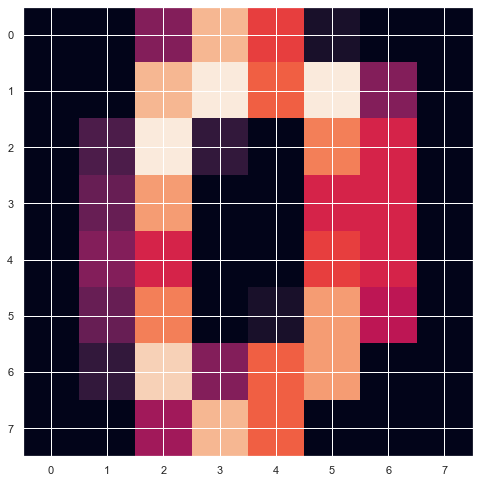

In [43]:
plt.imshow(X[0].reshape((8,8)))
plt.show()

Vamos a querer seleccionar 2 o 3 para la cantidad de componentes dado que t-SNE se usa estrictamente para visualización y solo podemos ver cosas en hasta 3 dimensiones. Por otro lado, la perplejidad está relacionada con el número de vecinos más cercanos utilizados en el algoritmo. Una perplejidad diferente puede provocar cambios drásticos en los resultados finales. En nuestro caso, lo configuramos al valor predeterminado de la implementación `scitkit-learn` es de t-SNE (30).  





 Según la documentación numpy, el épsilon de la máquina es el número positivo más pequeño representable tal que `1.0 + eps != 1.0`. En otras palabras, cualquier número por debajo del épsilon de la máquina no puede ser manipulado por la computadora ya que carece de los bits necesarios.

In [15]:
MACHINE_EPSILON = np.finfo(np.double).eps  # calcula el eepsilon de la maquina
n_components = 2
perplexity = 30
MACHINE_EPSILON

2.220446049250313e-16

In [16]:
def fit(X):
    n_samples = X.shape[0]
    
    # Calculamos la distacia euclideana 
    distances = pairwise_distances(X, metric='euclidean', squared=True)
    
    # Calcular las probabilidades conjuntas p_ij a partir de las distancias.
    P = _joint_probabilities(distances=distances, desired_perplexity=perplexity, verbose=False)
    
    # The embedding is initialized with iid samples from Gaussians with standard deviation 1e-4.
    # La incrustación se inicializa con muestras iid de gaussianos con desviación estándar 1e-4.
    X_embedded = 1e-4 * np.random.mtrand._rand.randn(n_samples, n_components).astype(np.float32)
    
    # degrees_of_freedom = n_components - 1 comes from
    # "Learning a Parametric Embedding by Preserving Local Structure"
    # Laurens van der Maaten, 2009.
    # degrees_of_freedom = n_components - 1 viene de
    # "Learning a Parametric Embedding by Preserving Local Structure"
    # Laurens van der Maaten, 2009
    degrees_of_freedom = max(n_components - 1, 1)
    
    return _tsne(P, degrees_of_freedom, n_samples, X_embedded=X_embedded)


Están sucediendo muchas cosas en esta función, así que dividámoslo paso a paso.

1. Almacenamos el número de muestras en una variable para referencia futura.

2. Calculamos la distancia euclidiana entre cada punto de datos. esto corresponde a $\|x_{i} — x_{j}\|^{2}$. en la ecuación anterior.

$$ P_{j|i} = \frac {exp (- \frac {\|x_{i}-x_{j}\|^{2}}{2\sigma_{i}^{2}})} {\sum_{k ≠ i } exp (- \frac {\|x_{i}-x_{j}\|^{2} }{2\sigma_{i}^{2}})}$$

3. Pasamos la distancia euclidiana calculada en el paso anterior como argumento a la _join_probabilitiesfunción que luego calcula y devuelve una matriz de p_jivalores (usando la misma ecuación).

4. Creamos el espacio de características reducido mediante la selección aleatoria de valores de distribuciones gaussianas con desviación estándar 1e-4.

5. Definimos el degrees_of_freedom. Hay un comentario en el código fuente que le dice que consulte este documento que explica su razonamiento. Básicamente, se ha demostrado empíricamente que obtenemos mejores resultados (en negrita) cuando usamos el número de componentes menos uno.



In [17]:
# Finalmente llamamos a la función tsne que se implementa de la siguiente manera.

def _tsne(P, degrees_of_freedom, n_samples, X_embedded):
    params = X_embedded.ravel()
    
    obj_func = _kl_divergence
    
    params = _gradient_descent(obj_func, params, [P, degrees_of_freedom, n_samples, n_components])
        
    X_embedded = params.reshape(n_samples, n_components)
    return X_embedded

In [18]:
def _kl_divergence(params, P, degrees_of_freedom, n_samples, n_components):
    X_embedded = params.reshape(n_samples, n_components)
    
    dist = pdist(X_embedded, "sqeuclidean")
    dist /= degrees_of_freedom
    dist += 1.
    dist **= (degrees_of_freedom + 1.0) / -2.0
    Q = np.maximum(dist / (2.0 * np.sum(dist)), MACHINE_EPSILON)
    
    # Kullback-Leibler divergence of P and Q
    kl_divergence = 2.0 * np.dot(P, np.log(np.maximum(P, MACHINE_EPSILON) / Q))
    
    # Gradient: dC/dY
    grad = np.ndarray((n_samples, n_components), dtype=params.dtype)
    PQd = squareform((P - Q) * dist)
    for i in range(n_samples):
        grad[i] = np.dot(np.ravel(PQd[i], order='K'),
                         X_embedded[i] - X_embedded)
    grad = grad.ravel()
    c = 2.0 * (degrees_of_freedom + 1.0) / degrees_of_freedom
    grad *= c
    return kl_divergence, grad

Nuevamente, repasemos el código paso a paso.

1. La primera parte calcula la distribución de probabilidad sobre los puntos en el mapa de baja dimensión.

$$ q_{i|j}  = \frac {(1 + \| y_{i} - y_{j} \|^{2})^{-1}} {\sum_{k ≠ i }(1+\| y_{k} - y_{i} \|^{2})^{-1}}$$

Los autores en realidad usan una variación de la ecuación anterior que incluye los grados de libertad.

$$ q_{i|j}  = \frac {(1 + \frac{\| y_{i} - y_{j} \|^{2}}{\alpha})^{-\frac{\alpha + 1 }{2}}} {\sum_{k ≠ i }(1+ \frac {\| y_{k} - y_{i} \|^{2}}{\alpha})^{-\frac {\alpha + 1 } {2} }}$$

donde α representa el número de grados de libertad de la distribución Student-t

2. Calculamos la divergencia KL (pista: cada vez que vea, np.dotpiense en la suma).

$$ KL(P\|Q) = \sum_{i,j}  p_{ij} \log { \frac {p_{ij}} {q_{ij}}}$$

3. Calculamos el gradiente (derivadas parciales). distestá en realidad yi — yj en:

$$ \frac {\partial C}{\partial y_{i}} = 2 \sum_{j} (p_{ij}-q_{ij})(y_{i}-y_{j}) $$

Nuevamente, usan una variación de la ecuación anterior con los grados de libertad.

$$ \frac {\partial C}{\partial y_{i}} = \frac{2\alpha + 2}{\alpha} \sum_{j} (p_{ij}-q_{ij})(y_{i}-y_{j}) $$

donde α representa el número de grados de libertad de la distribución Student-t

La función de descenso de gradiente actualiza los valores en la incrustación al minimizar la divergencia KL. Nos detenemos prematuramente cuando la norma de gradiente está por debajo del umbral o cuando alcanzamos el número máximo de iteraciones sin hacer ningún progreso.

In [21]:
def _gradient_descent(obj_func, p0, args, it=0, n_iter=1000,
                      n_iter_check=1, n_iter_without_progress=300,
                      momentum=0.8, learning_rate=200.0, min_gain=0.01,
                      min_grad_norm=1e-7):
    
    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float64).max
    best_error = np.finfo(np.float64).max
    best_iter = i = it
    
    for i in range(it, n_iter):
        error, grad = obj_func(p, *args)
        grad_norm = linalg.norm(grad)
        inc = update * grad < 0.0
        dec = np.invert(inc)
        gains[inc] += 0.2
        gains[dec] *= 0.8
        np.clip(gains, min_gain, np.inf, out=gains)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update
        print("[t-SNE] Iteration {:d}: error = {:.7f}, gradient norm = {:.7f}".format(i + 1, error, grad_norm))
        
        if error < best_error:
                best_error = error
                best_iter = i
        elif i - best_iter > n_iter_without_progress:
            break
        
        if grad_norm <= min_grad_norm:
            break
    return p

C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

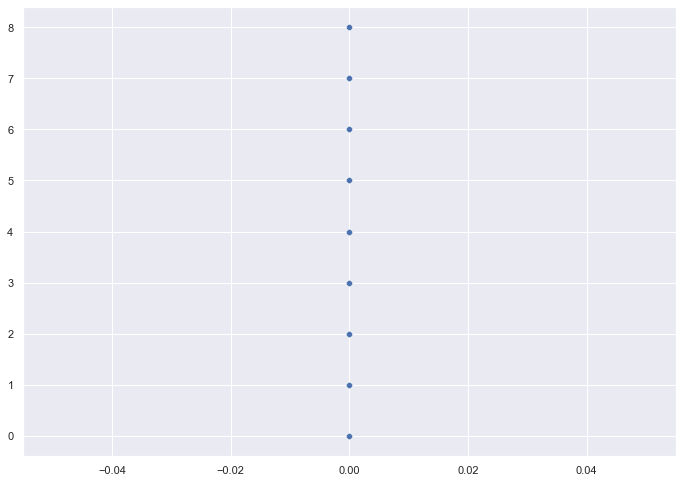

In [27]:
sns.scatterplot(X[:,0], X[:,1]  ) # ,hue=y, legend='full', palette=palette)

In [22]:
X_embedded = fit(X)

[t-SNE] Iteration 1: error = 3.9810953, gradient norm = 0.0000047
[t-SNE] Iteration 2: error = 3.9810953, gradient norm = 0.0000049
[t-SNE] Iteration 3: error = 3.9810953, gradient norm = 0.0000062
[t-SNE] Iteration 4: error = 3.9810953, gradient norm = 0.0000095
[t-SNE] Iteration 5: error = 3.9810952, gradient norm = 0.0000163
[t-SNE] Iteration 6: error = 3.9810950, gradient norm = 0.0000302
[t-SNE] Iteration 7: error = 3.9810942, gradient norm = 0.0000592
[t-SNE] Iteration 8: error = 3.9810909, gradient norm = 0.0001230
[t-SNE] Iteration 9: error = 3.9810750, gradient norm = 0.0002690
[t-SNE] Iteration 10: error = 3.9809913, gradient norm = 0.0006174
[t-SNE] Iteration 11: error = 3.9805092, gradient norm = 0.0014793
[t-SNE] Iteration 12: error = 3.9775169, gradient norm = 0.0036503
[t-SNE] Iteration 13: error = 3.9585070, gradient norm = 0.0087187
[t-SNE] Iteration 14: error = 3.8581267, gradient norm = 0.0163486
[t-SNE] Iteration 15: error = 3.5648709, gradient norm = 0.0189686
[t-S

C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

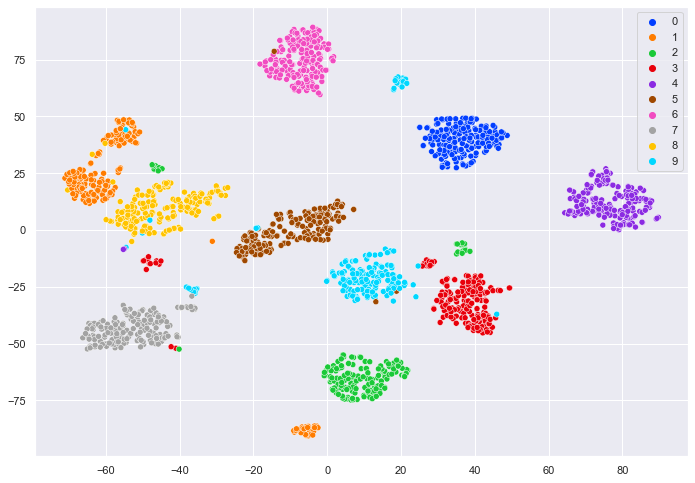

In [23]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

Como podemos ver, el modelo logró tomar un conjunto de datos de 64 dimensiones y proyectarlo en un espacio bidimensional de tal manera que muestras similares se agrupan.

In [24]:
tsne = TSNE()
X_embedded = tsne.fit_transform(X)

C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

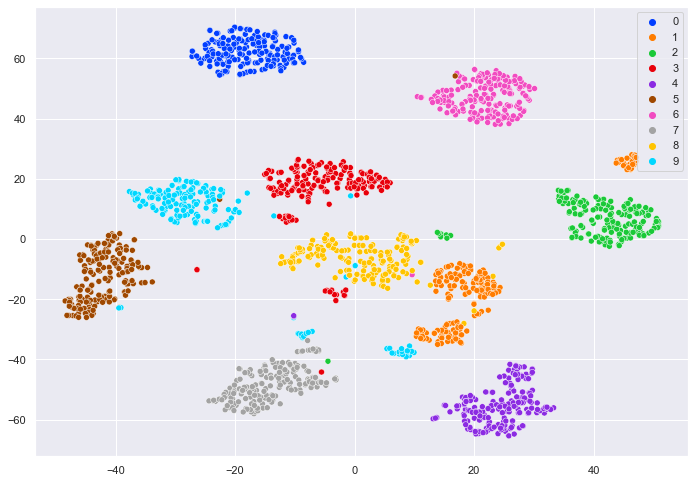

In [25]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

fuente : https://towardsdatascience.com/t-sne-python-example-1ded9953f26